# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 05/05 antes do início da aula
- O projeto será feito em grupo definido pelo professor
- A entrega deve ser feita em jupyter notebook com os códigos explícitos e comentados. Além disso os conceitos, decisões e conclusões usadas devem estar destacadas no notebook

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

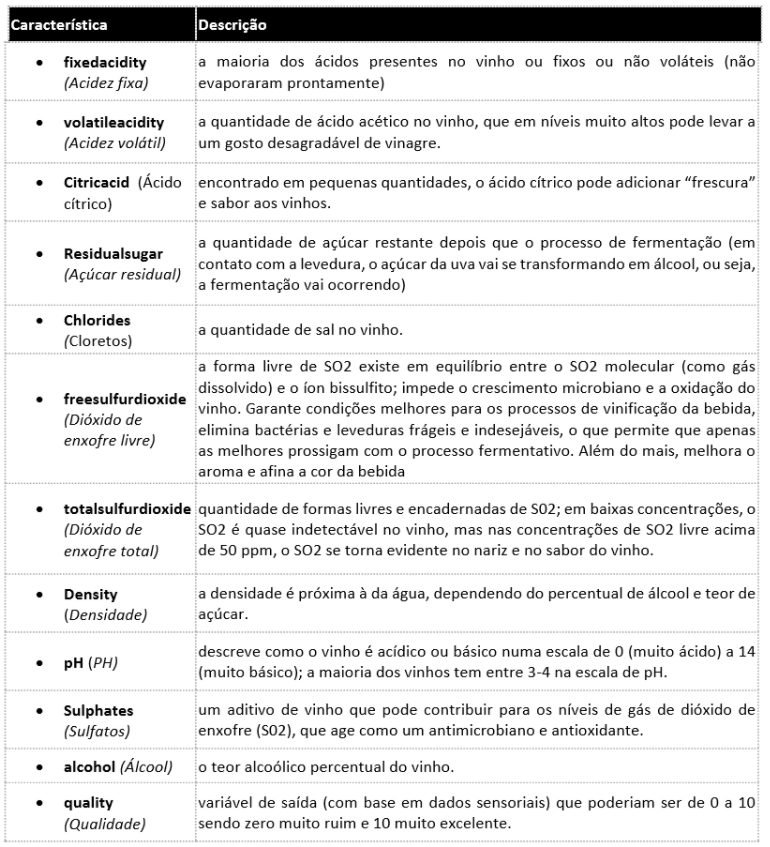

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Indentificação e tratamento de outliers, caso necessário (sempre explicando a opção)
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 4

**Regressão logística**

- Em função de suas características físico-químicas, tente classificar se o vinho é tinto ou branco;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

---

---

# Resolução
## Etapa I - EDA

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [17]:
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
red['type'] = 'red' 

white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
white['type'] = 'white'

df = pd.concat([red, white])
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [15]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white

In [22]:
df.reset_index(inplace=True, drop = True)

In [25]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [19]:
def grafico(variavel):
    plt.figure(figsize=(10, 4))
    plt.title("Distribuição de " + variavel, size=14)
    sns.histplot(df[variavel], kde=True, alpha=0.8)


    # plotando média
    plt.axvline(x=df[variavel].mean(), color="red", label="média")

    # plotando a mediana
    plt.axvline(df[variavel].median(), color="green", label="mediana")

    # Loop para plotar as modas
    for i in range(df[variavel].mode().shape[0]):
        plt.axvline(df[variavel].mode()[i], color="yellow", label="moda")

    plt.axvline(df[variavel].quantile(0.25), color="orange", label="q1")
    plt.axvline(df[variavel].quantile(0.75), color="pink", label="q3")

    IQR = df[variavel].quantile(0.75) - df[variavel].quantile(0.25)
    plt.axvline(df[variavel].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
    plt.axvline(df[variavel].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

    plt.legend()

    plt.show()

    plt.figure(figsize=(10, 4))
    plt.title("Boxplot " + variavel, size=14)
    sns.boxplot(data=df, x=variavel, color='green', boxprops=dict(alpha=.4))

    plt.show()

    plt.figure(figsize=(10, 4))
    plt.title("Gráfico de dispersão: " + variavel + ' vs ' + 'quality' , size=14)
    sns.scatterplot(data=df, x=variavel, y='quality', color='red')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(4, 4))

    stats.probplot(df[variavel], plot=ax) #vou aumentando o tamanho da amostra

    plt.tight_layout()
    plt.show()

In [20]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [26]:
# describe
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [28]:
df.select_dtypes(include="float").columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

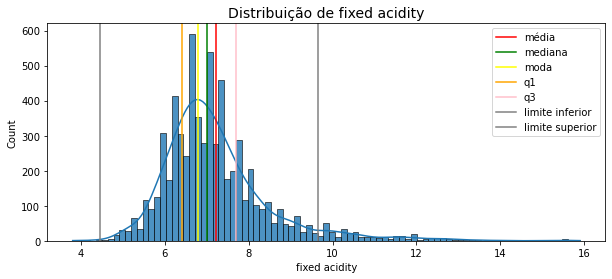

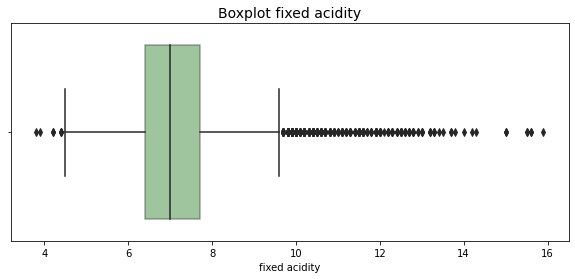

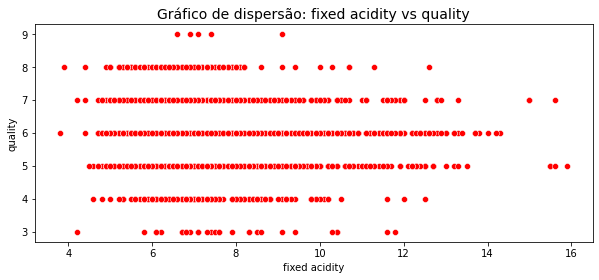

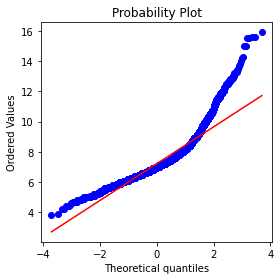

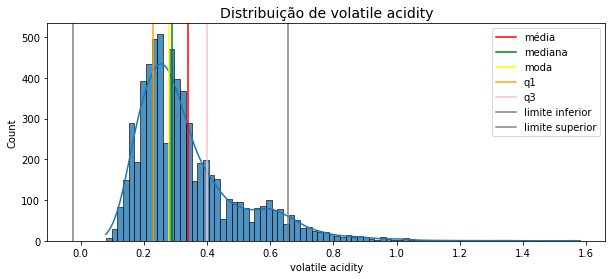

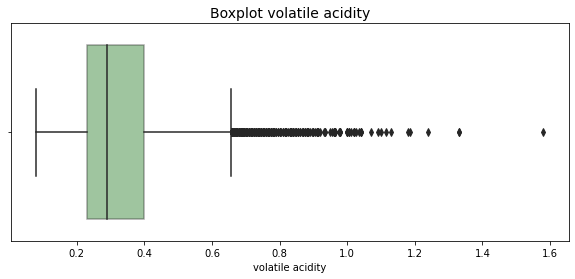

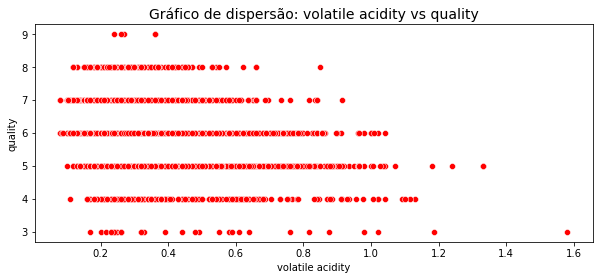

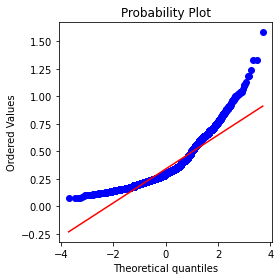

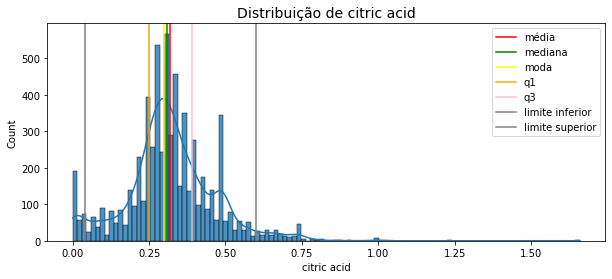

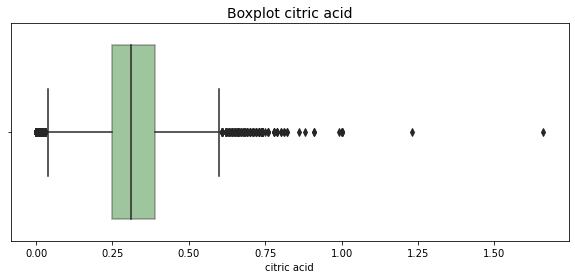

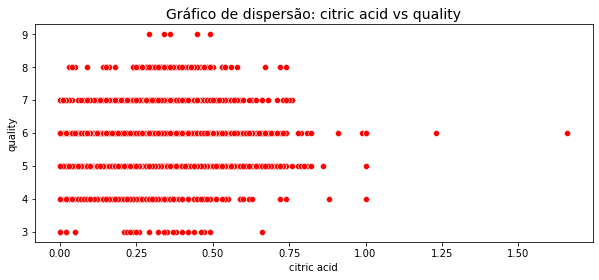

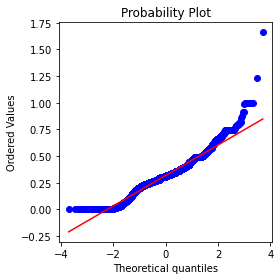

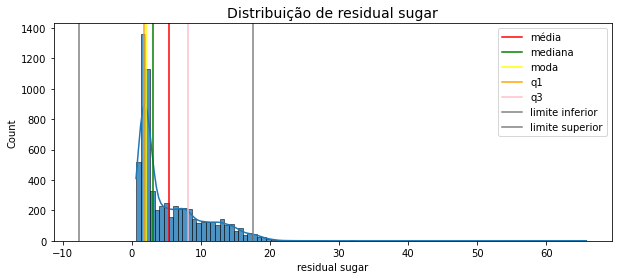

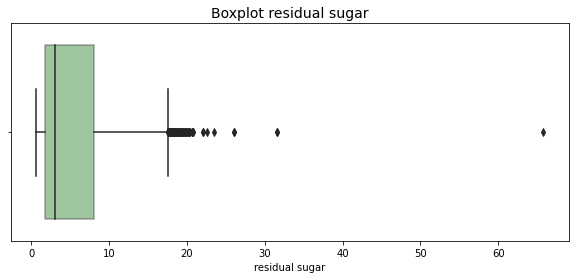

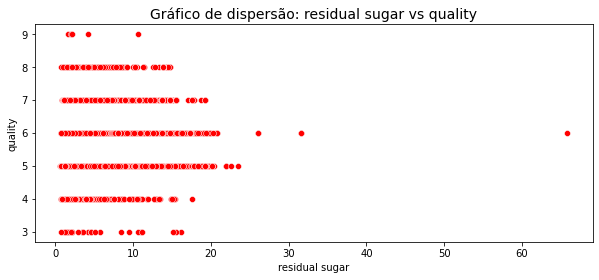

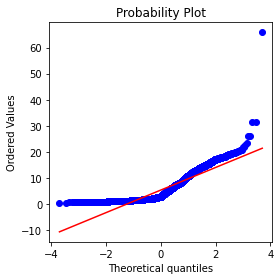

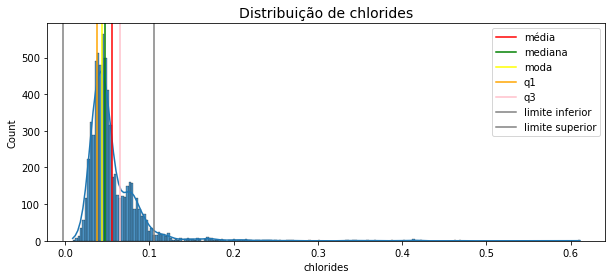

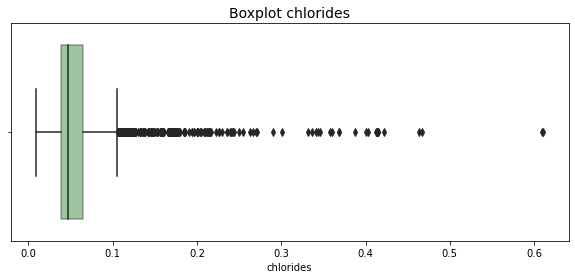

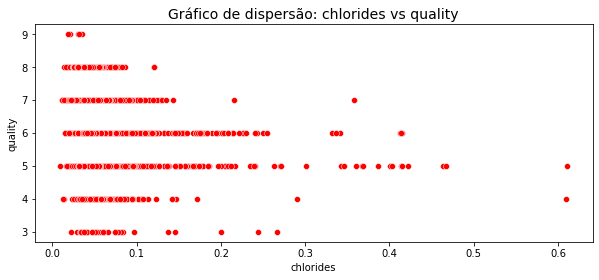

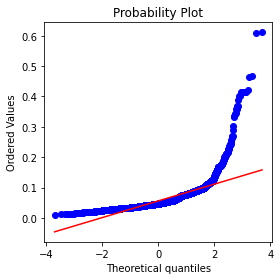

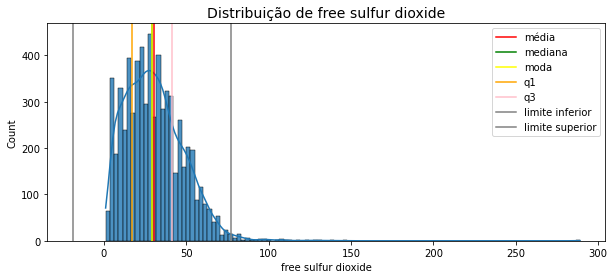

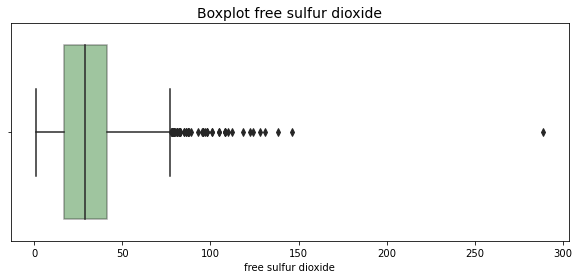

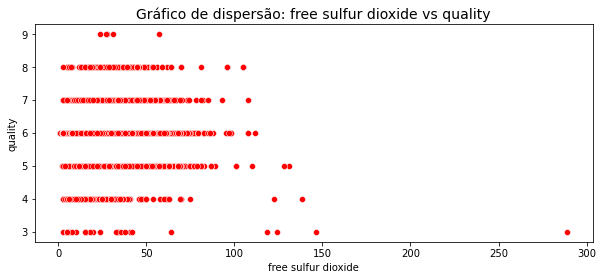

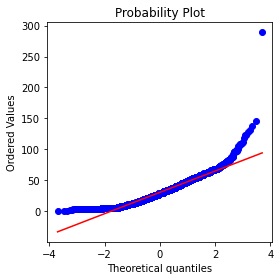

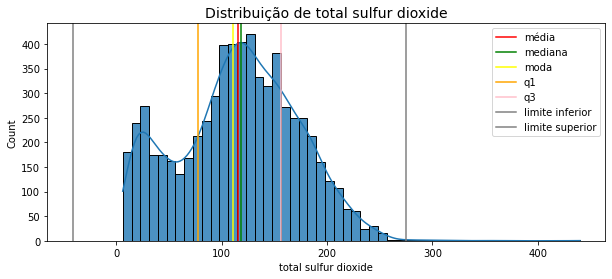

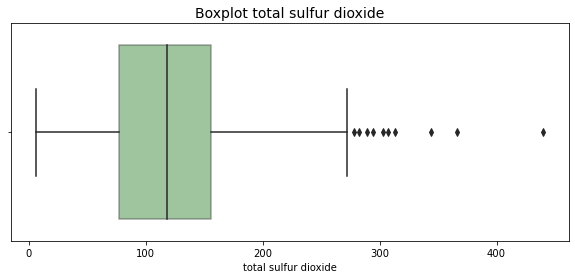

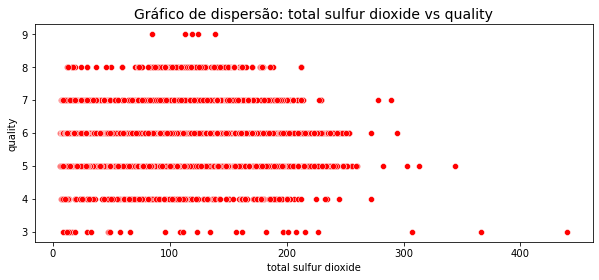

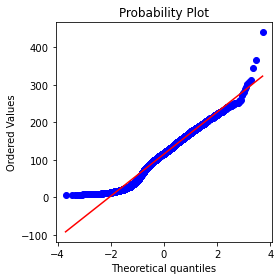

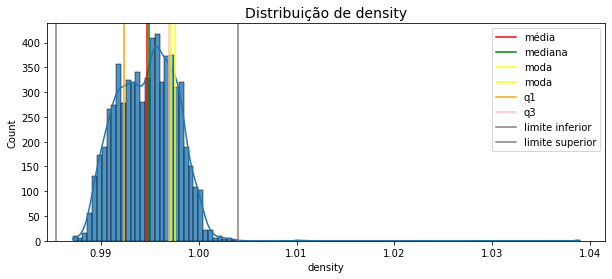

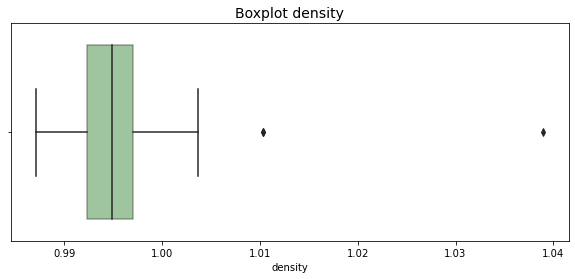

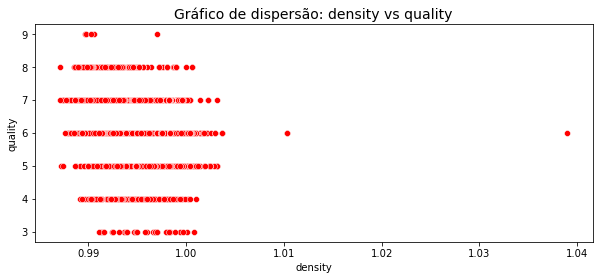

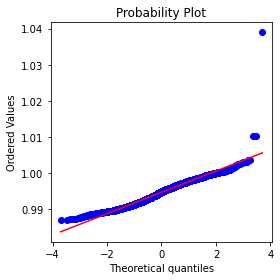

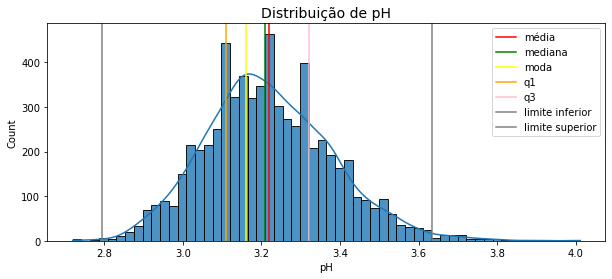

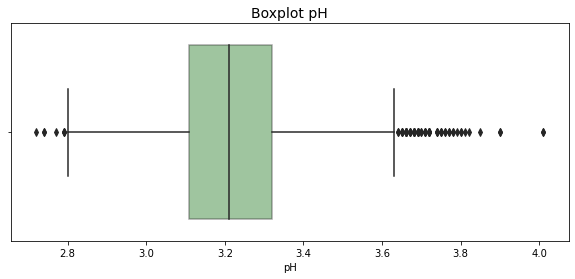

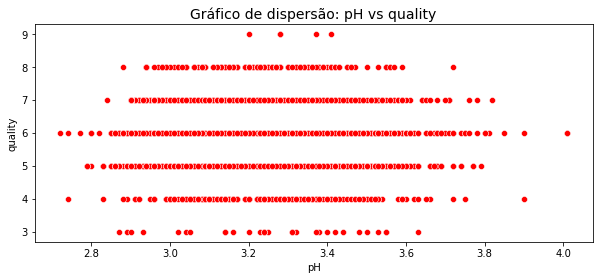

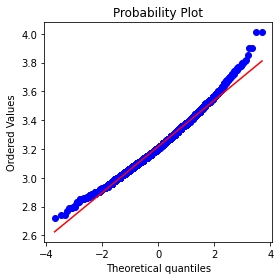

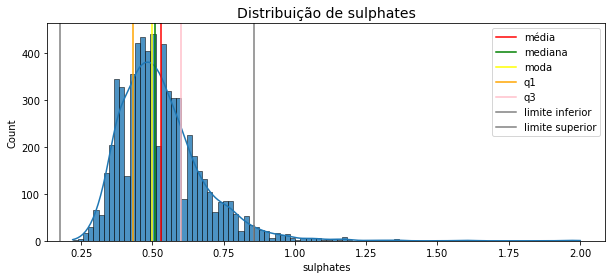

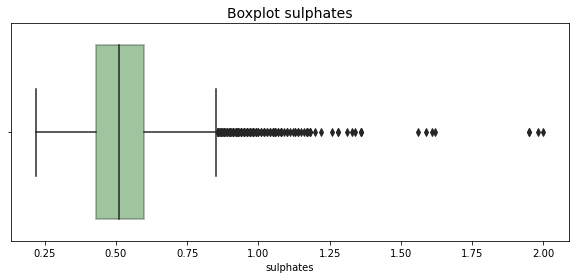

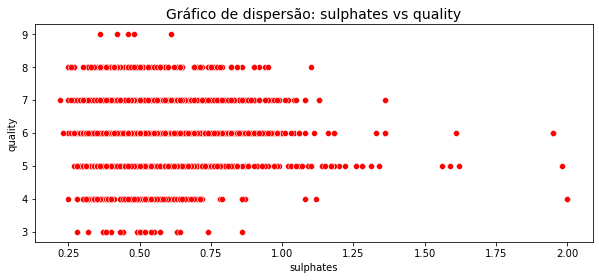

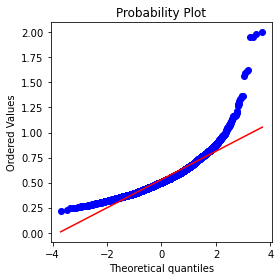

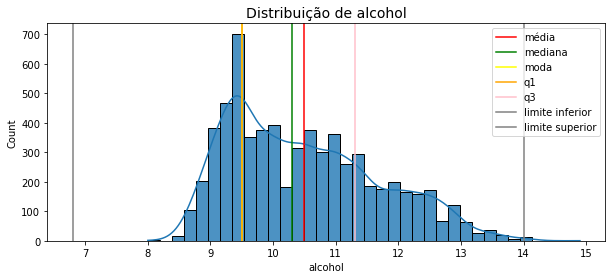

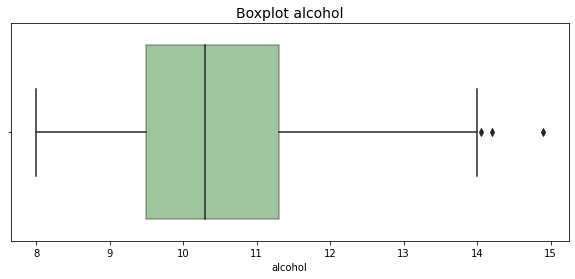

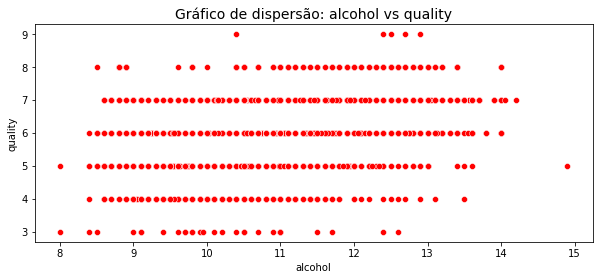

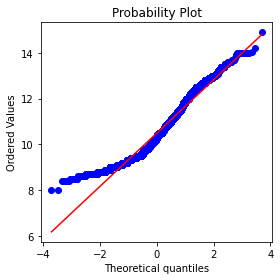

In [29]:
# graficos
num_cols = df.select_dtypes(include="float").columns

for var in num_cols:
    grafico(var)

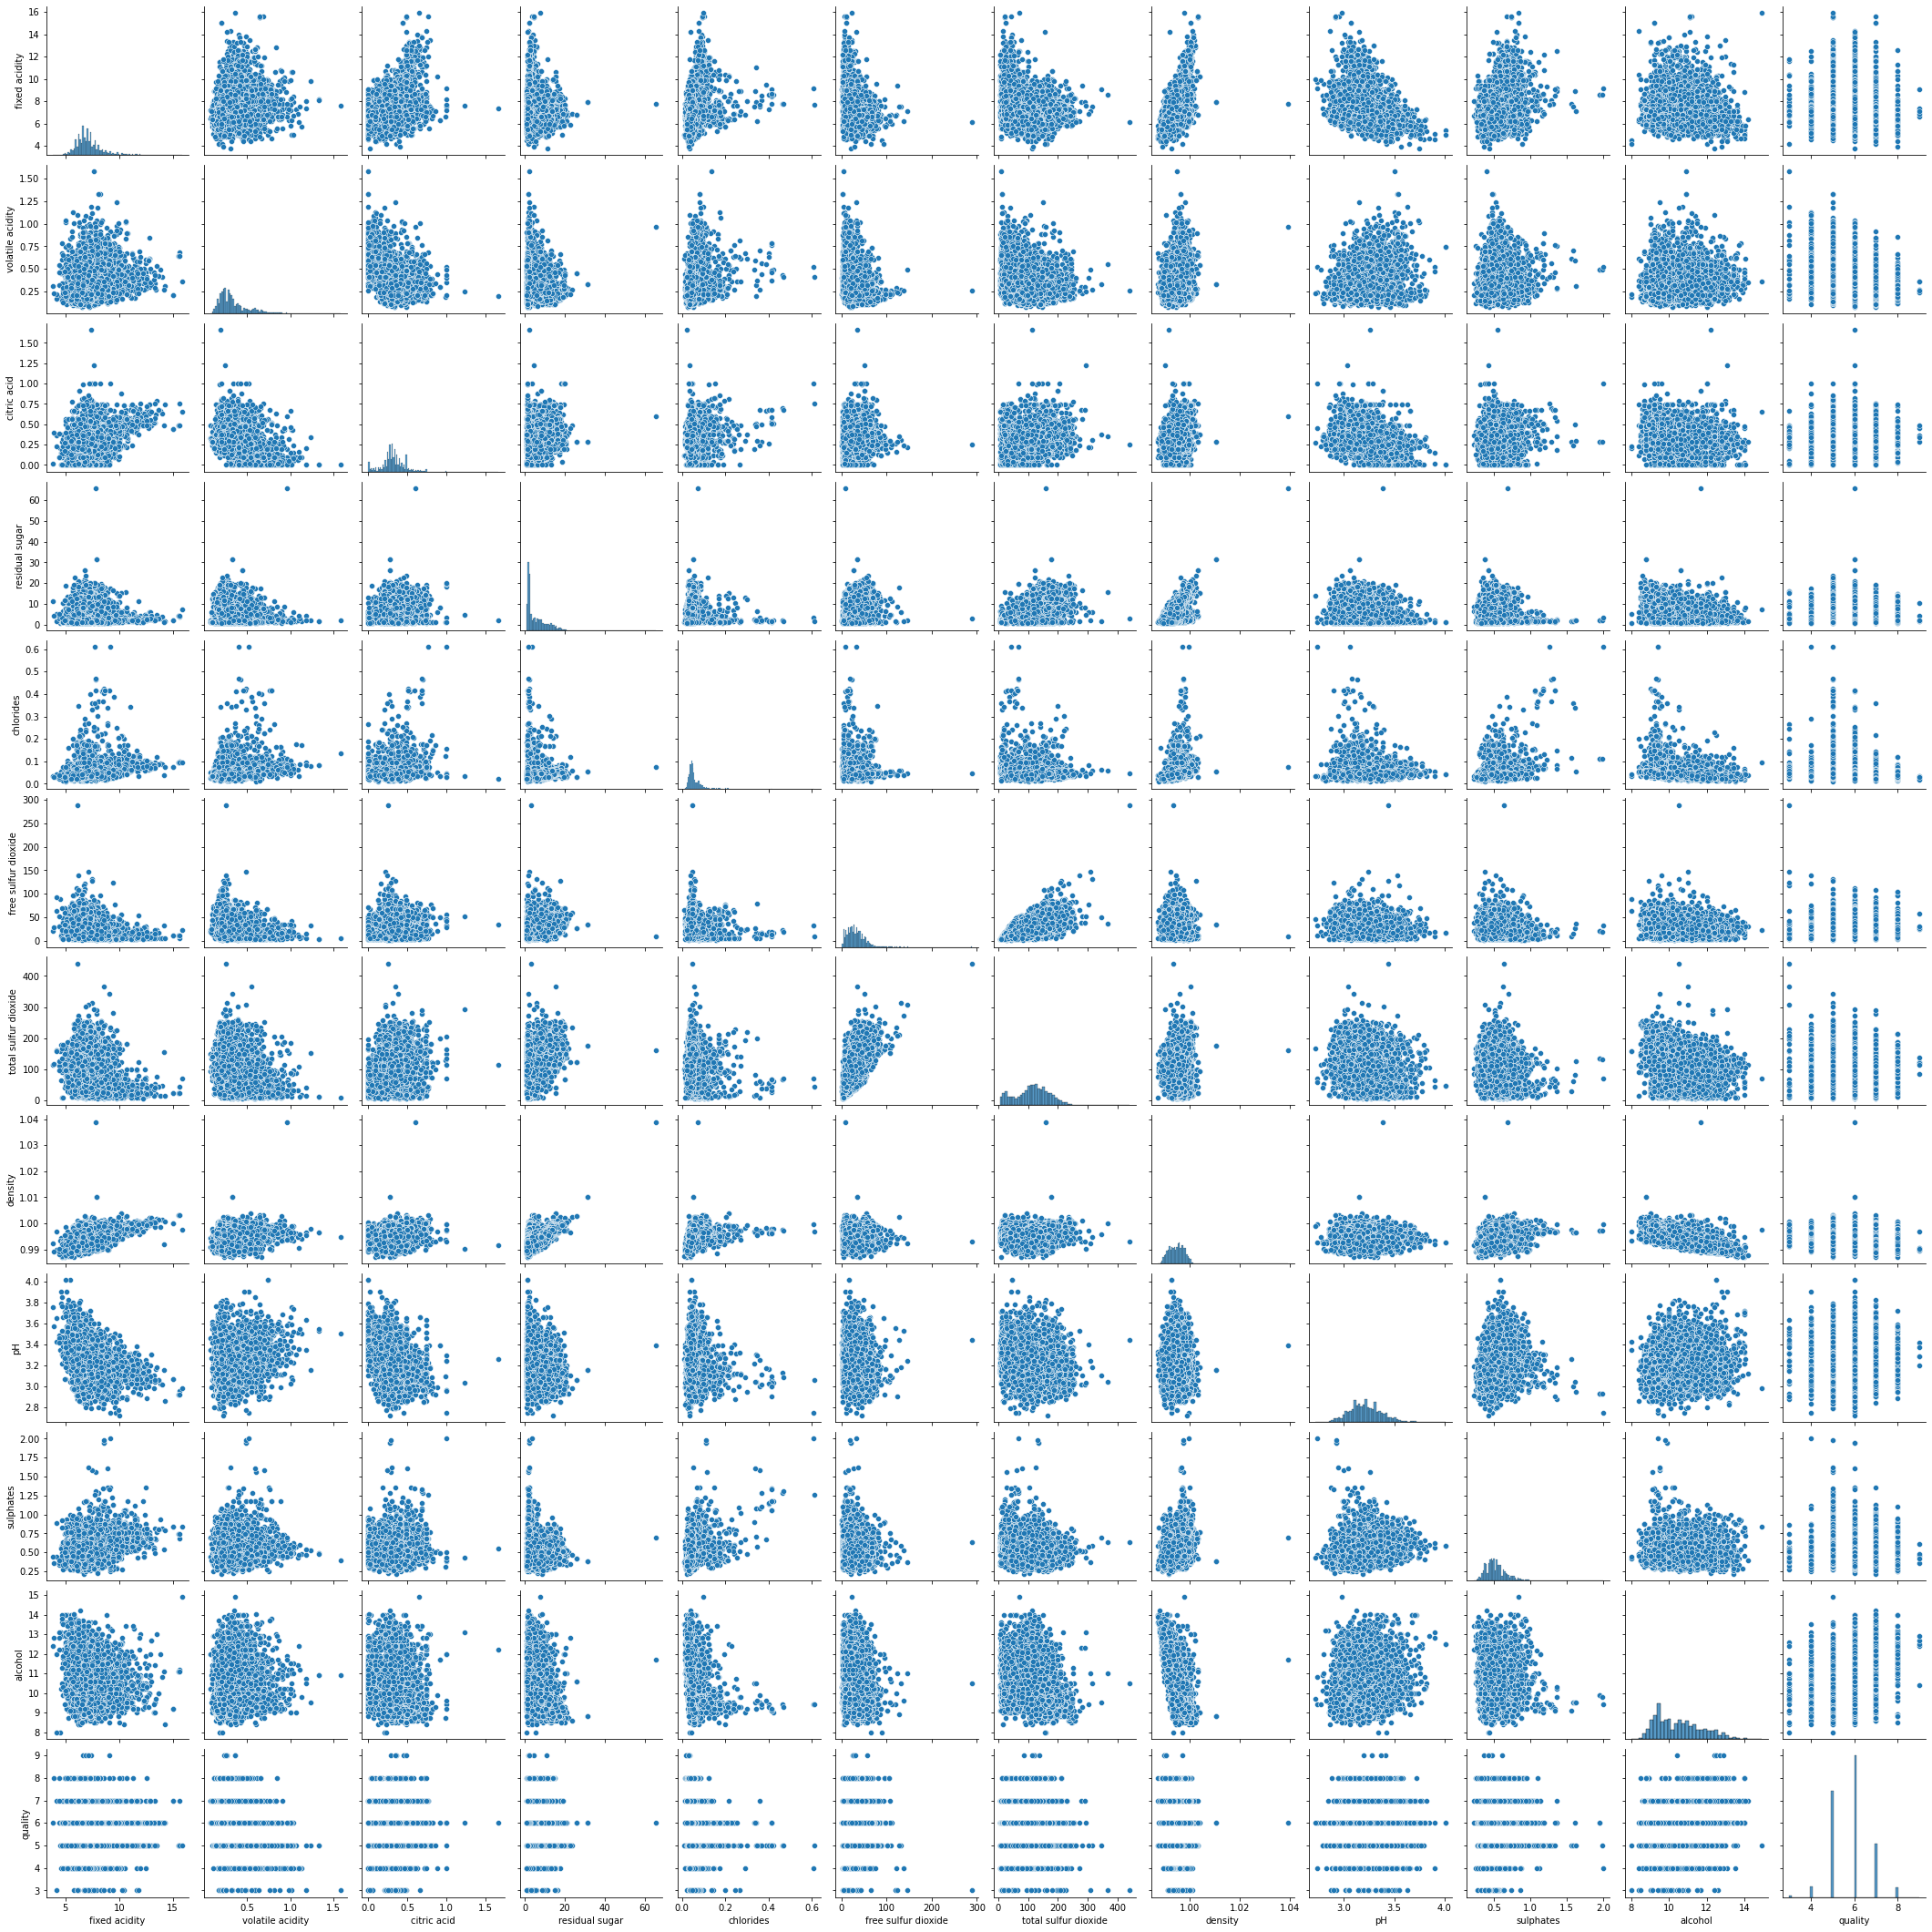

In [30]:
# associacao
sns.pairplot(data = df)

In [32]:
df = pd.get_dummies(df, prefix_sep = "_", columns = ["type"], drop_first = True)

In [33]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
type_white                -0.486740         -0.653036     0.187397   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   
type_white                  0.348821  -0.512678             0.471644   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   
type_white                        0.700357 -0.390645 -0.329129  -0.487218   

                       alcohol   quality  type_white  
fixed acidity        -0.095452 -0.076743   -0.486740  
volatile acidity     -0.037640 -0.265699   -0.653036  
citric acid          -0.010493  0.085532    0.187397  
residual sugar       -0.359415 -0.036980    0.348821  
chlorides            -0.256916 -0.200666   -0.512678  
free sulfur dioxide  -0.179838  0.055463    0.471644  
total sulfur dioxide -0.265740 -0.041385    0.700357  
density              -0.686745 -0.305858   -0.390645  
pH                    0.121248  0.019506   -0.329129  
sulphates            -0.003029  0.038485   -0.487218  
alcohol               1.000000  0.444319    0.032970  
quality               0.444319  1.000000    0.119323  
type_white            0.032970  0.119323    1.000000

<AxesSubplot:>

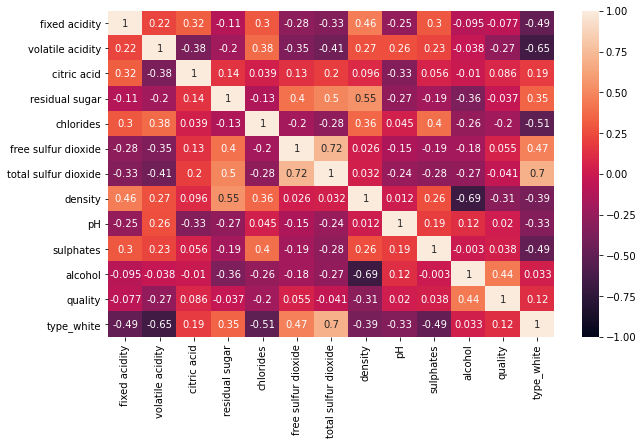

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,vmax=1, vmin = -1)

# Voltamos 20:45

## Etapa II - Reg. Lin

In [36]:
# pre proc
scaler = StandardScaler()
scaler.fit(df.drop(["quality"], axis = 1))

StandardScaler()

In [37]:
X = scaler.transform(df.drop(["quality"], axis = 1))
y = df["quality"]

In [38]:
X

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -1.75018984],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.57136659],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  0.57136659],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.57136659]])

In [39]:
y

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [40]:
# modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred

array([6.72402631, 5.15181414, 6.30808037, ..., 6.45810828, 6.45608146,
       5.59400472])

In [47]:
# eval
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred, squared=False))

0.27685112268483325
0.7263871748775004


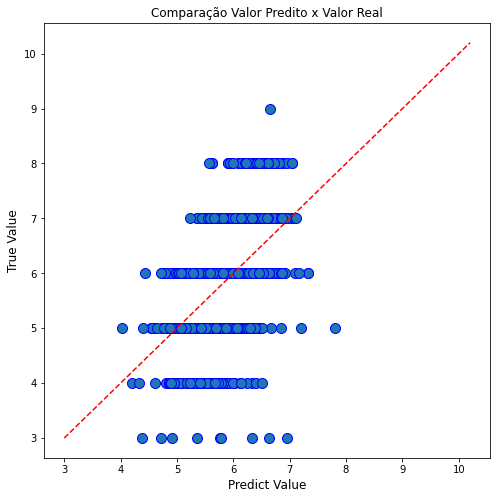

In [49]:
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

In [50]:
# iterpretacao
coefs = model.coef_

list_columns = df.drop(['quality'], axis=1).columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features

Features    Scores
0         residual sugar  0.310424
1                alcohol  0.281407
2          fixed acidity  0.120335
3              sulphates  0.112777
4    free sulfur dioxide  0.105293
5                     pH  0.081431
6              chlorides -0.011068
7            citric acid -0.015338
8   total sulfur dioxide -0.093771
9             type_white -0.139861
10      volatile acidity -0.253308
11               density -0.308717

<AxesSubplot:xlabel='Scores', ylabel='Features'>

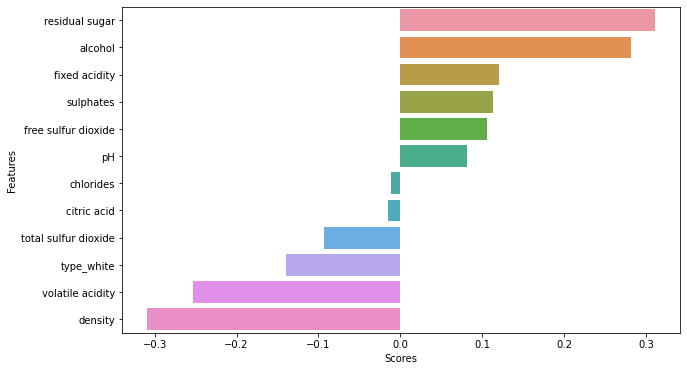

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data = df_features, x= "Scores", y = "Features")

## Etapa III - Reg. Log. Qualidade

In [65]:
df["new_quality"] = 0 #"ruim"
df.loc[df.quality >= 6, "new_quality"] = 1 #"bom" 

<AxesSubplot:xlabel='new_quality', ylabel='count'>

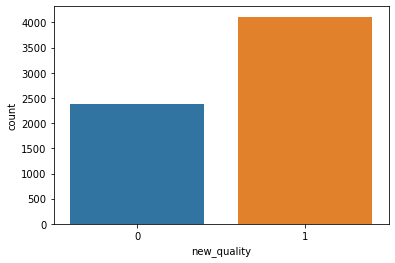

In [66]:
sns.countplot(data = df, x = "new_quality")

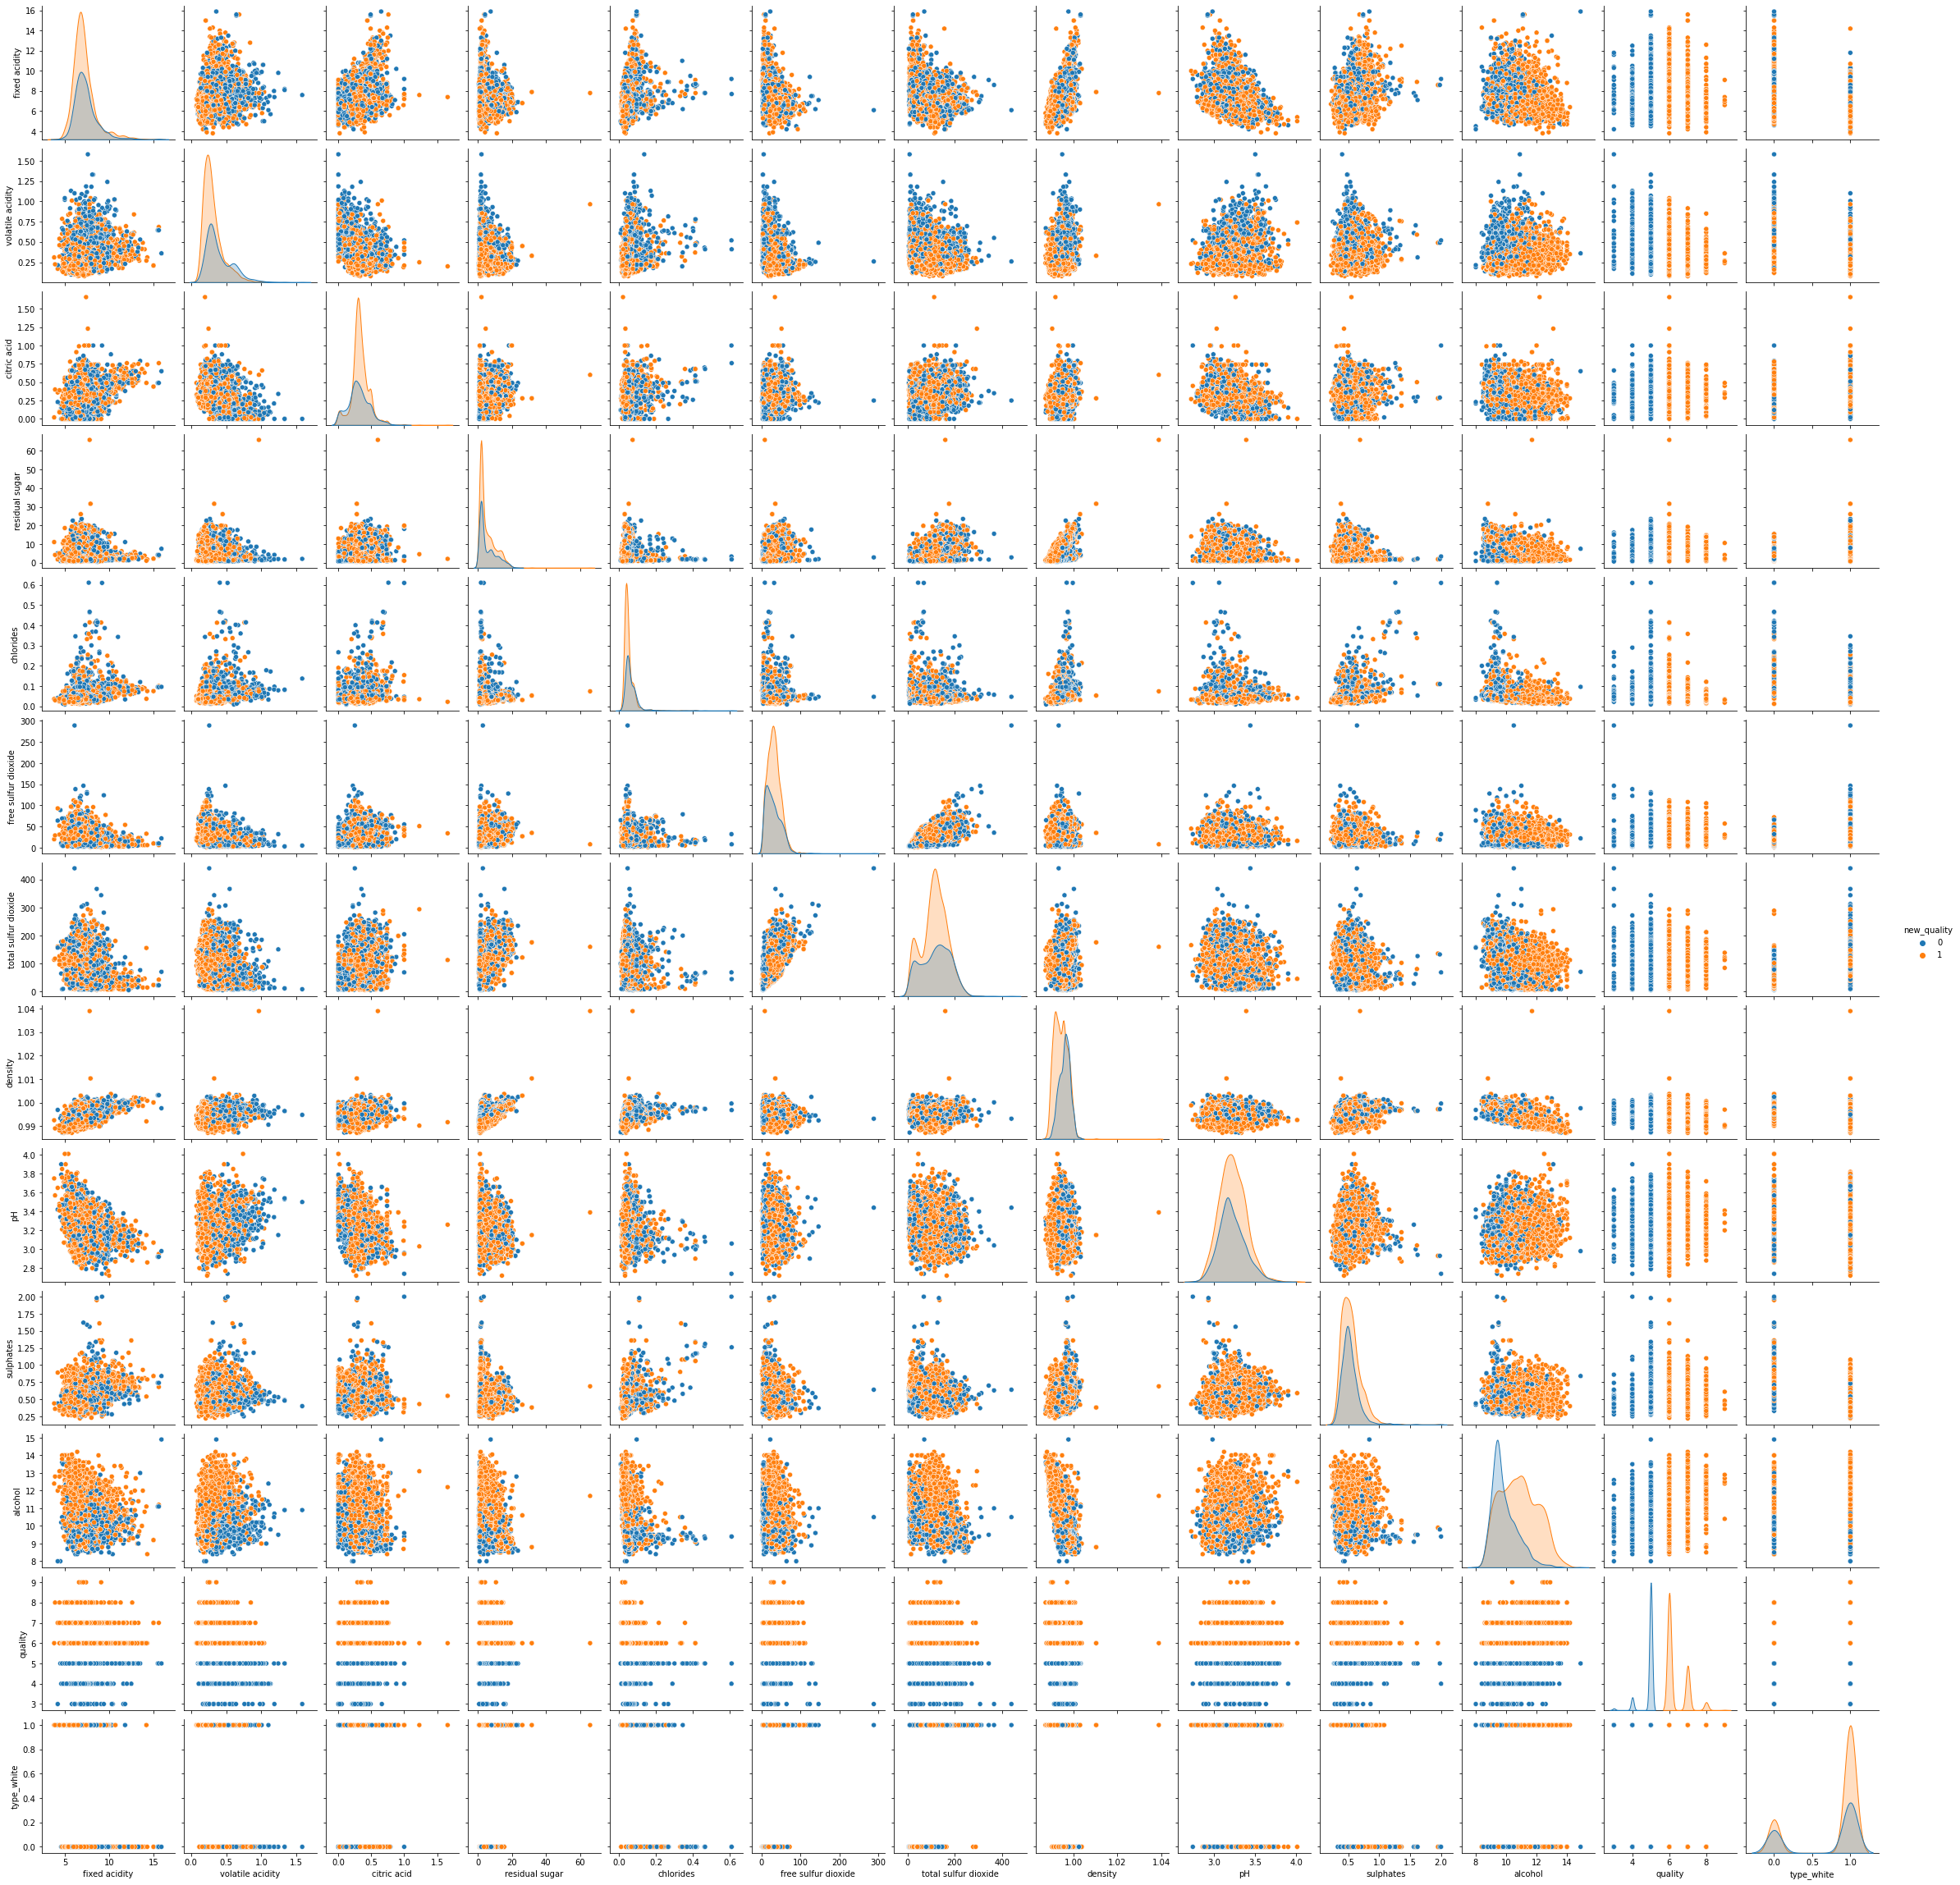

In [67]:
sns.pairplot(df, hue = "new_quality")

In [68]:
X = df.drop(["quality", "new_quality"], axis=1)
y = df.new_quality

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
lr = LogisticRegression(max_iter=20_000, penalty = "l2")
model1 = lr.fit(X_train, y_train)

In [71]:
lrpred = model1.predict(X_test)

In [72]:
metrics.confusion_matrix(lrpred, y_test)

array([[ 397,  231],
       [ 294, 1028]])

In [76]:
model1.score(X_test, y_test)

0.7307692307692307

In [74]:
print(metrics.classification_report(lrpred, y_test))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       628
           1       0.82      0.78      0.80      1322

    accuracy                           0.73      1950
   macro avg       0.70      0.70      0.70      1950
weighted avg       0.74      0.73      0.73      1950



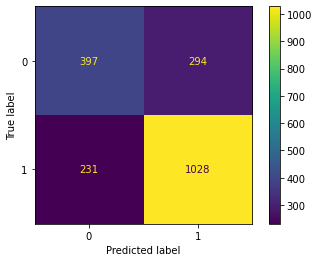

In [77]:
metrics.plot_confusion_matrix(lr, X_test, y_test)

## Etapa IV - Reg. Log. Vinho

In [91]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type_white  new_quality  
0      9.4        5           0            0  
1      9.8        5           0            0  
2      9.8        5           0            0  
3      9.8        6           0            1  
4      9.4        5           0            0

In [99]:
X = df.drop(["type_white", "new_quality"], axis = 1)
y = df.type_white

In [100]:
scaler = StandardScaler()
scaler.fit(df.drop(["type_white", "new_quality"], axis = 1))
X = scaler.transform(df.drop(["type_white", "new_quality"], axis = 1))

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
lr = LogisticRegression(max_iter=20_000, penalty = "l2")
model2 = lr.fit(X_train, y_train)

In [103]:
lrpred_vinho = model2.predict(X_test)

In [104]:
print(metrics.classification_report(lrpred_vinho, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       501
           1       0.99      0.99      0.99      1449

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



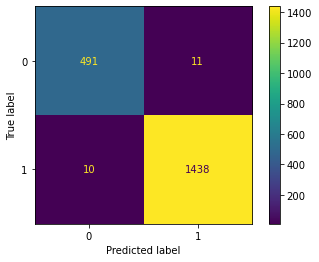

In [105]:
metrics.plot_confusion_matrix(lr, X_test, y_test)

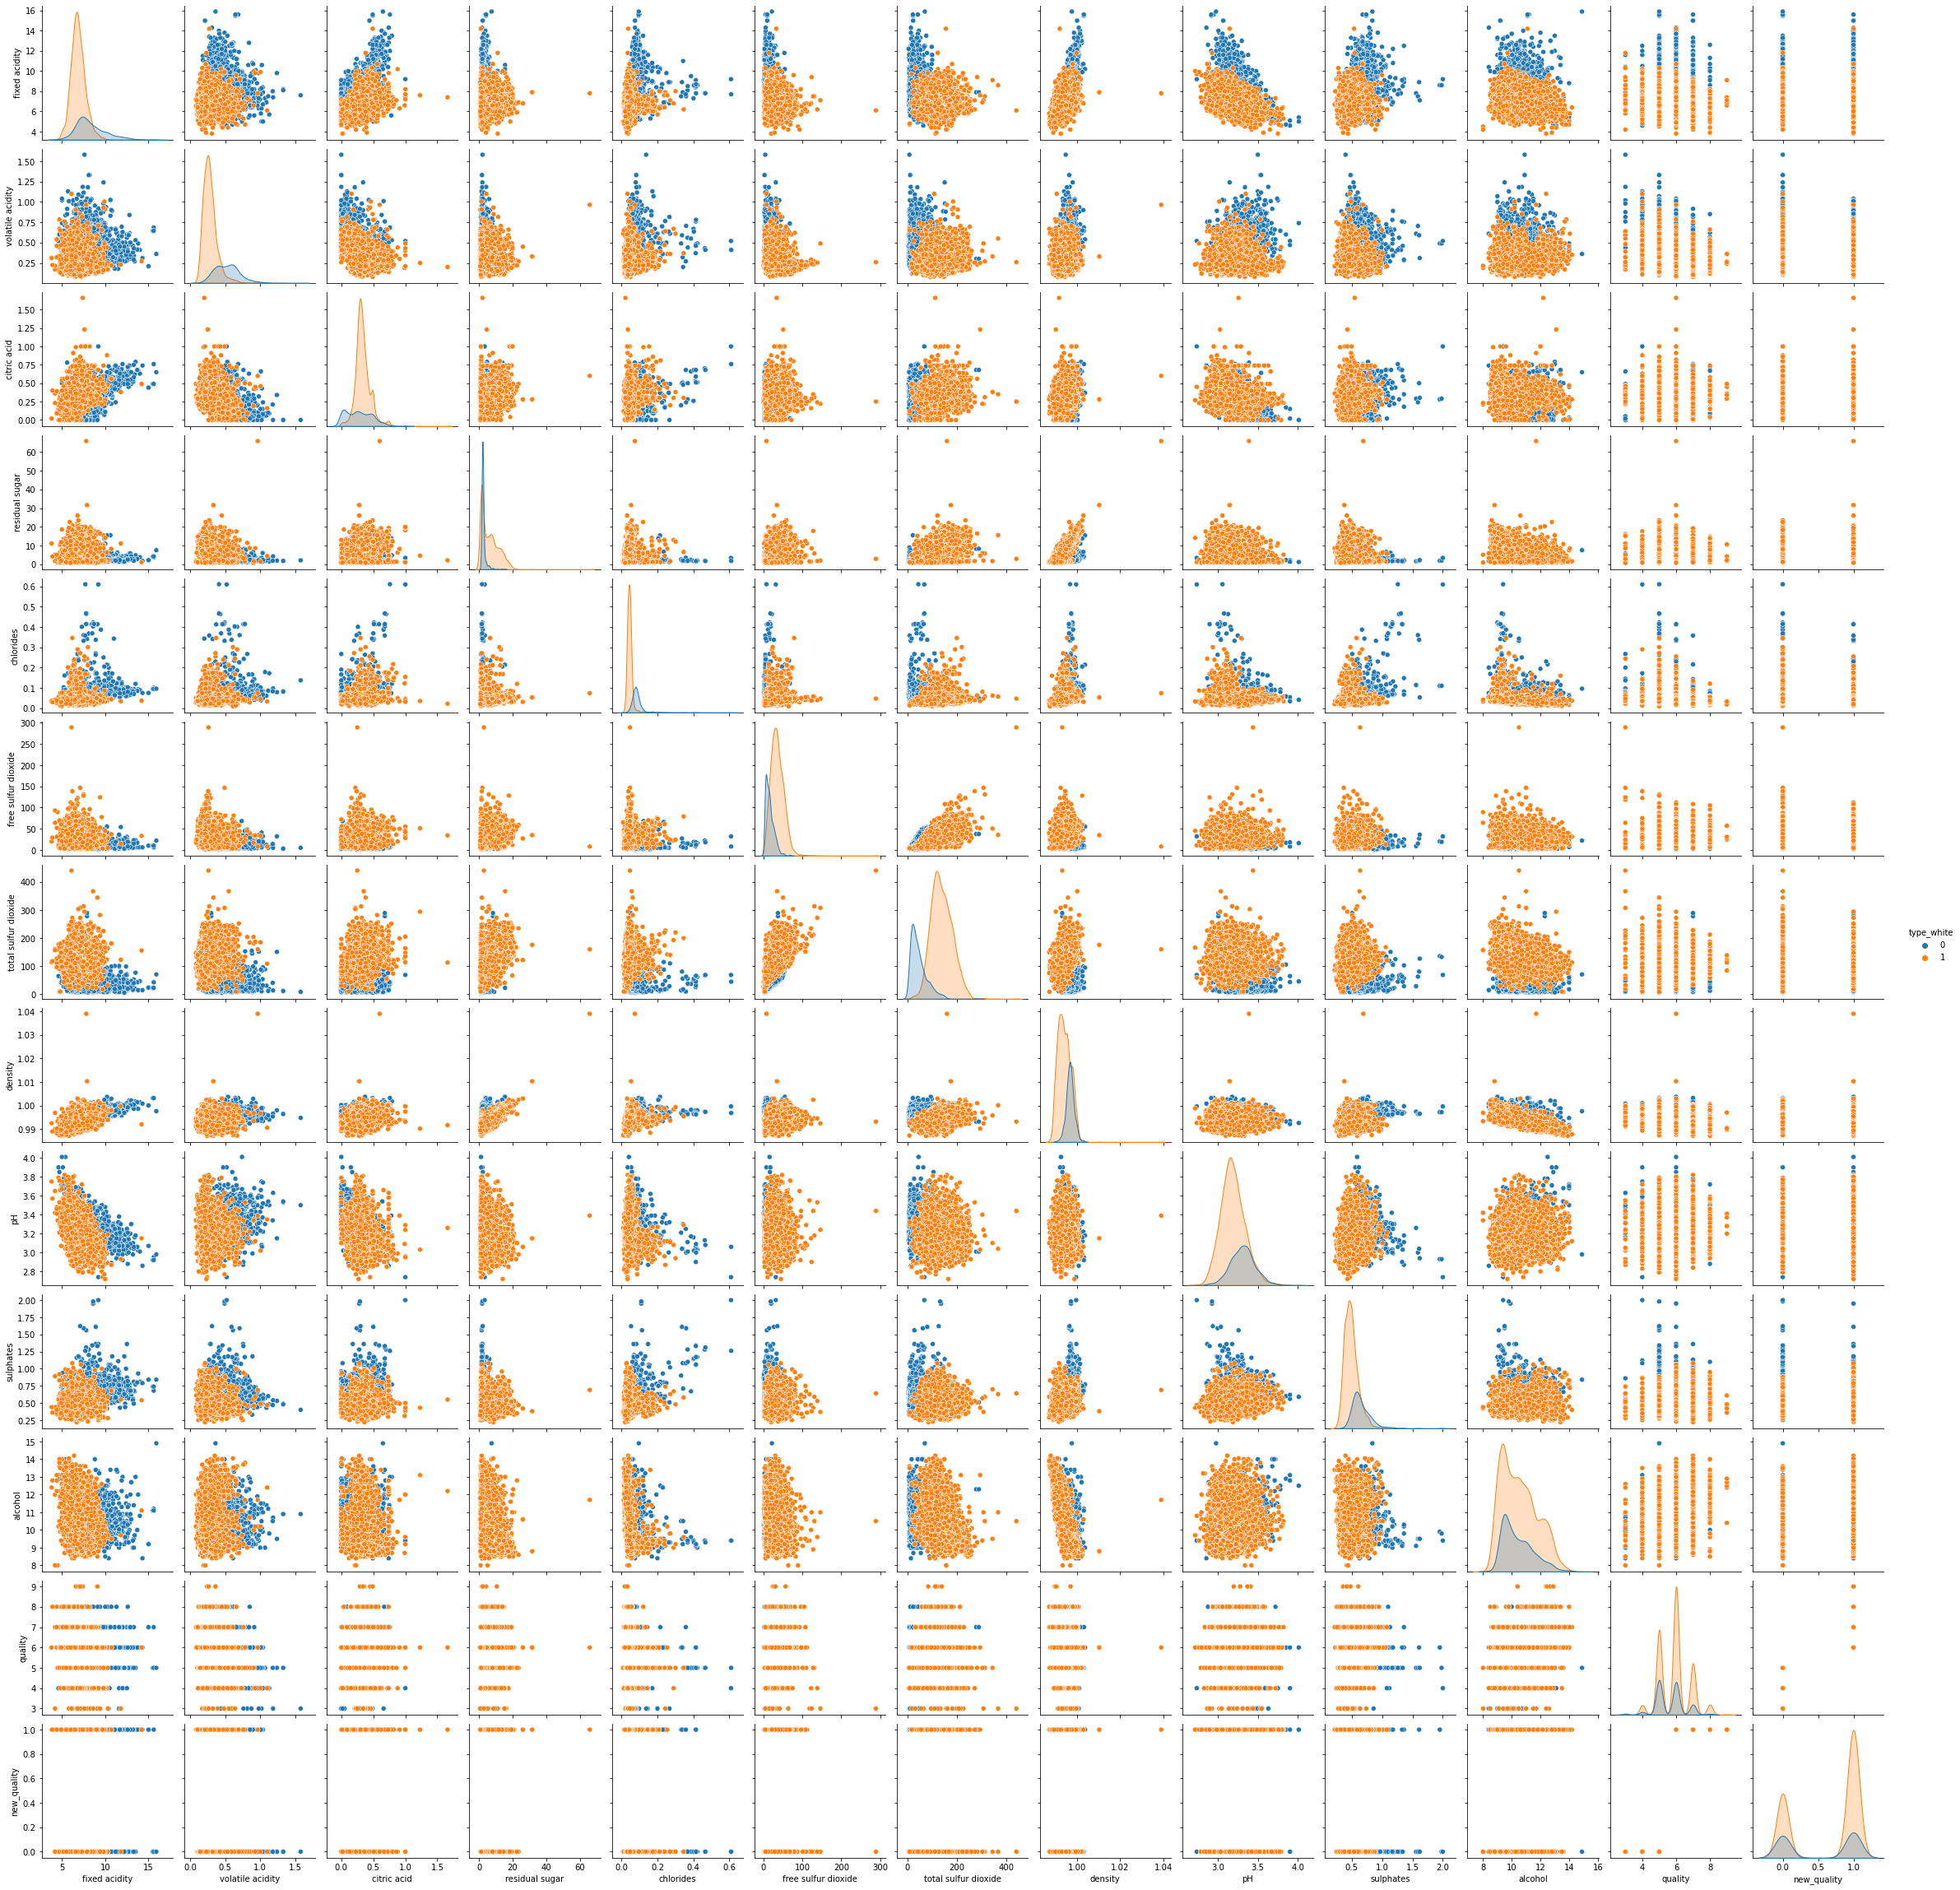

In [106]:
sns.pairplot(df, hue = "type_white")

In [93]:
df.drop(['type_white', "new_quality"], axis=1).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [96]:
lr.coef_[0]

array([-1.23090352, -8.04607977,  1.1445723 ,  0.13104087, -2.4042132 ,
       -0.04441022,  0.05771044, -0.19320791, -5.69320388, -5.76252304,
        0.49915548,  0.07644004])

In [107]:
# iterpretacao
coefs = lr.coef_[0]

list_columns = df.drop(['type_white', "new_quality"], axis=1).columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features

Features    Scores
0         residual sugar  3.454601
1   total sulfur dioxide  2.883158
2            citric acid  0.364304
3                quality -0.233079
4                     pH -0.341199
5          fixed acidity -0.623748
6              sulphates -0.753587
7    free sulfur dioxide -0.868613
8              chlorides -0.871710
9                alcohol -0.935099
10      volatile acidity -1.568874
11               density -3.153924

<AxesSubplot:xlabel='Scores', ylabel='Features'>

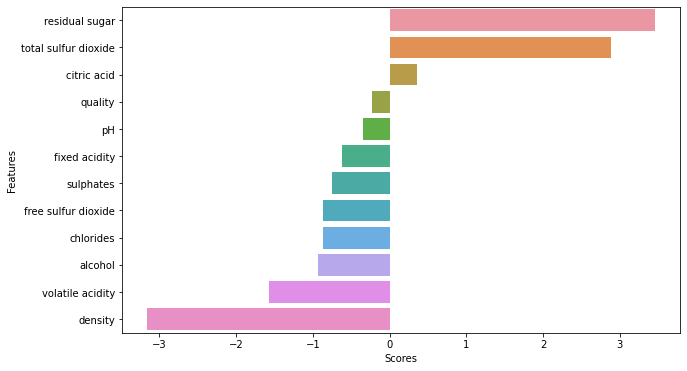

In [108]:
plt.figure(figsize=(10,6))
sns.barplot(data = df_features, x= "Scores", y = "Features")